In [1]:
%pip install albumentations==0.4.6
import cv2
import torchvision
import torch
import torchvision.transforms as transforms
from torchvision import datasets,transforms#
# Albumentations for augmentations
import albumentations as A
from albumentations.pytorch import ToTensorV2

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: C:\Users\SAHITHI\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
from torch.utils.data import Dataset, DataLoader
from dataset import Cifar10SearchDataset
cv2.setNumThreads(0)

cv2.ocl.setUseOpenCL(False)

Cifar10SearchDataset(Dataset)







In [3]:
from dataset import get_loader
from transform import get_a_train_transform, get_a_test_transform
batch_size = 128
use_cuda=True
train_loader, test_loader = get_loader(get_a_train_transform(), get_a_test_transform(), batch_size=batch_size, use_cuda=use_cuda)


print(get_a_train_transform())

print(get_a_test_transform())

print(train_loader)
print('length of train_loader',len(train_loader))
print(test_loader)
print('length of test_loader',len(test_loader))



Files already downloaded and verified
Files already downloaded and verified
Compose([
  HorizontalFlip(always_apply=False, p=0.5),
  ShiftScaleRotate(always_apply=False, p=0.5, shift_limit=(-0.0625, 0.0625), scale_limit=(-0.09999999999999998, 0.10000000000000009), rotate_limit=(-45, 45), interpolation=1, border_mode=4, value=None, mask_value=None),
  RandomBrightnessContrast(always_apply=False, p=0.5, brightness_limit=(-0.2, 0.2), contrast_limit=(-0.2, 0.2), brightness_by_max=True),
  CoarseDropout(always_apply=False, p=0.5, max_holes=1, max_height=16, max_width=16, min_holes=1, min_height=16, min_width=16),
  Normalize(always_apply=False, p=1.0, mean=(0.4914, 0.4822, 0.4465), std=(0.247, 0.2435, 0.2616), max_pixel_value=255.0),
  ToTensorV2(always_apply=True, p=1.0),
], p=1.0, bbox_params=None, keypoint_params=None, additional_targets={})
Compose([
  Normalize(always_apply=False, p=1.0, mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.201), max_pixel_value=255.0),
  ToTensorV2(al

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

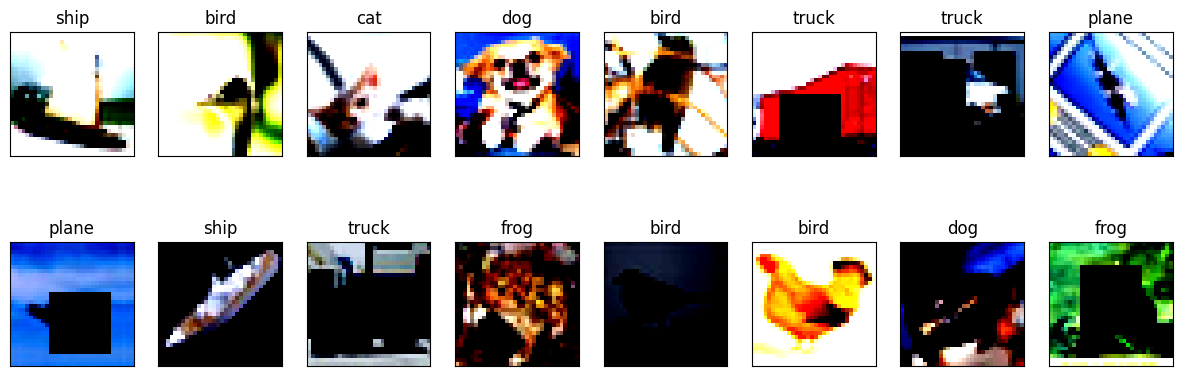

In [4]:
from utils import  print_samples

print_samples(train_loader)

In [5]:
%pip install torchsummary
from torchsummary import summary
from model import Net,model_summary
from training import train_model,test_model

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)


model = Net().to(device)
summary(model, input_size=(3, 32, 32))


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: C:\Users\SAHITHI\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


cpu
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 30, 30]             448
       BatchNorm2d-2           [-1, 16, 30, 30]              32
              ReLU-3           [-1, 16, 30, 30]               0
           Dropout-4           [-1, 16, 30, 30]               0
            Conv2d-5           [-1, 16, 28, 28]             592
       BatchNorm2d-6           [-1, 16, 28, 28]              32
              ReLU-7           [-1, 16, 28, 28]               0
           Dropout-8           [-1, 16, 28, 28]               0
            Conv2d-9           [-1, 16, 28, 28]             272
      BatchNorm2d-10           [-1, 16, 28, 28]              32
             ReLU-11           [-1, 16, 28, 28]               0
          Dropout-12           [-1, 16, 28, 28]               0
           Conv2d-13           [-1, 32, 22, 22]           4,640
      BatchNorm2d-14           [-1,

In [6]:
model

Net(
  (conv11): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Dropout(p=0.01, inplace=False)
  )
  (conv12): Sequential(
    (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), groups=4)
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Dropout(p=0.01, inplace=False)
  )
  (conv13): Sequential(
    (0): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Dropout(p=0.01, inplace=False)
  )
  (conv21): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), dilation=(3, 3))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(32, 32, kernel_size=(

In [7]:
import torch
import torch.optim as optim
import torch.nn.functional as F
#from torch.optim.lr_scheduler import StepLR

model =  Net().to(device)
# criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, betas=(0.9, 0.999), eps=1e-08, weight_decay=1e-05, amsgrad=False)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, 0.01, epochs=50,steps_per_epoch=len(train_loader))
# scheduler = StepLR(optimizer, step_size=6, gamma=0.1)


EPOCHS = 50
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train_model(model, device, train_loader, optimizer, epoch)
    # scheduler.step()
    test_model(model, device, test_loader)

EPOCH: 0


Loss=1.570932149887085 Batch_id=390 Accuracy=31.98: 100%|██████████| 391/391 [08:07<00:00,  1.25s/it] 



Test set: Average loss: 1.6403, Accuracy: 4168/10000 (41.68%)

EPOCH: 1


Loss=1.6036971807479858 Batch_id=390 Accuracy=42.34: 100%|██████████| 391/391 [07:34<00:00,  1.16s/it]



Test set: Average loss: 1.4010, Accuracy: 4981/10000 (49.81%)

EPOCH: 2


Loss=1.3929779529571533 Batch_id=390 Accuracy=46.16: 100%|██████████| 391/391 [08:06<00:00,  1.25s/it]



Test set: Average loss: 1.2650, Accuracy: 5414/10000 (54.14%)

EPOCH: 3


Loss=1.3039246797561646 Batch_id=273 Accuracy=48.55:  70%|███████   | 274/391 [07:25<02:36,  1.33s/it]